In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
dataset = pd.read_csv("Data/toi/wine.csv", parse_dates=True)

In [4]:
dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [5]:
def calculate_outliers(dataset, parametr):
  Q1 = dataset[f'{parametr}'].quantile(0.25)
  Q3 = dataset[f'{parametr}'].quantile(0.75)

  # Определение границ для выбросов
  lower_bound = Q1 - 1.5 * (dataset[f'{parametr}'].quantile(0.75) - dataset[f'{parametr}'].quantile(0.25))
  upper_bound = Q3 + 1.5 * (dataset[f'{parametr}'].quantile(0.75) - dataset[f'{parametr}'].quantile(0.25))

  # Поиск выбросов
  outliers = dataset[(dataset[f'{parametr}'] < lower_bound) | (dataset[f'{parametr}'] > upper_bound)]
  return outliers

In [6]:
def hist(parametr, weight, dataset):
  min = dataset[f'{parametr}'].min()
  max = dataset[f'{parametr}'].max()
  mean = dataset[f'{parametr}'].mean() # среднее арифметическое
  median = dataset[f'{parametr}'].median() # значение среднего в выборке экземпляра
  moda = dataset[f'{parametr}'].value_counts().index[0] # наиболее часто встречаемое значение
  Gmean = stats.gmean(dataset[f'{parametr}']) # среднее геометрическое
  wmean = (dataset[f'{parametr}'] * dataset[f'{weight}']).sum() / dataset[f'{weight}'].sum() # взвешенное среднее
  change_interval = dataset[f'{parametr}'].max() - dataset[f'{parametr}'].min() # интервал изменения
  interquartile_interval = dataset[f'{parametr}'].quantile(0.75) - dataset[f'{parametr}'].quantile(0.25) # межквартильный интервал
  interdecile_interval = dataset[f'{parametr}'].quantile(0.9) - dataset[f'{parametr}'].quantile(0.1) # интердецильный интервал
  reference_interval = dataset[f'{parametr}'].quantile(0.95) - dataset[f'{parametr}'].quantile(0.05) # референтный интервал
  dispersion = dataset[f'{parametr}'].var() # дисперсия
  standard_deviation = dataset[f'{parametr}'].std() # среднеквадратичное отклонение
  asymmetry_coefficient = dataset[f'{parametr}'].skew() # коэффициент асимметрии
  kurtosis_coefficient = dataset[f'{parametr}'].kurtosis() # коэффициент эксцесса

  fig, ax = plt.subplots(figsize=(10, 5))

  # Создание гистограммы
  n, bins, patches = ax.hist(dataset[f'{parametr}'], alpha=0.7, rwidth=0.85, density=True)

  # Нанесение кривой нормального распределения
  x = np.linspace(min, max, 100)
  p = stats.norm.pdf(x, mean, standard_deviation)
  ax.plot(x, p, 'k', color='red', linewidth=2)

  # Добавление текста справа от графика
  textstr = '\n'.join([
      'Среднее арифметическое: {:.2f}'.format(mean),
      'Медиана: {:.2f}'.format(median),
      'Мода: {}'.format(moda),
      'Среднее геометрическое: {:.2f}'.format(Gmean),
      'Взвешенное среднее: {:.2f}'.format(wmean),
      'Интервал изменения: {}'.format(change_interval),
      'Межквартильный интервал: {}'.format(interquartile_interval),
      'Интердецильный интервал: {}'.format(interdecile_interval),
      'Референтный интервал: {}'.format(reference_interval),
      'Дисперсия: {:.2f}'.format(dispersion),
      'Стандартное отклонение: {:.2f}'.format(standard_deviation),
      'Коэффициент Асимметрии: {:.2f}'.format(asymmetry_coefficient),
      'Коэффициент эксцесса: {:.2f}'.format(kurtosis_coefficient)
  ])

  props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
  ax.text(1.05, 0.5, textstr, verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=props)

  # Установка заголовка и меток осей
  ax.set_title('Гистограмма с графиком распределения')
  ax.set_xlabel('Значение')
  ax.set_ylabel('Частота')

  # Отображение графика
  plt.show()

In [7]:
#parametr = 'points'
#weight = 'price'
parametr = 'price'
weight = 'points'

/var/folders/hh/fhwp4kk9375b4r8jygg93gzc0000gn/T/ipykernel_31734/2402064502.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', color='red', linewidth=2)


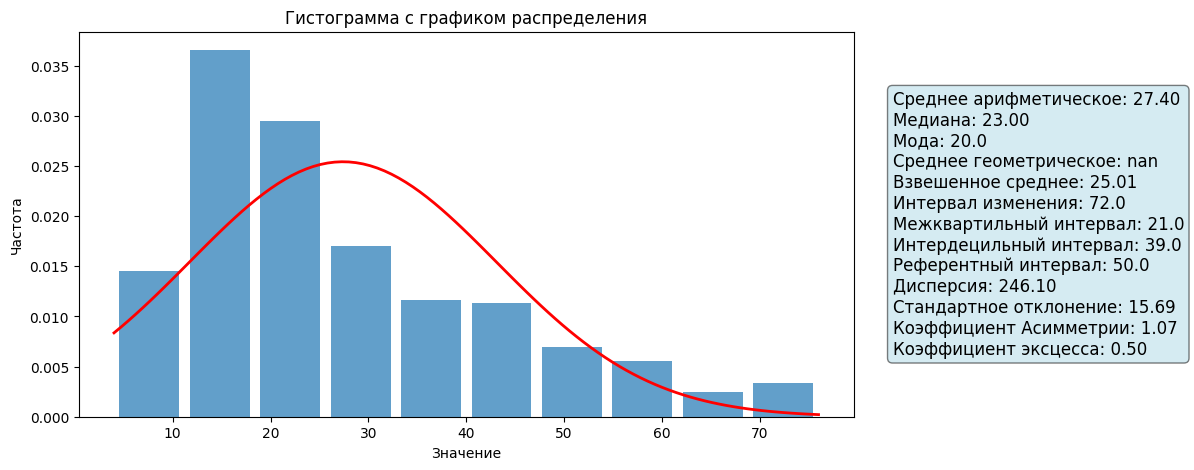

In [8]:
outliers = calculate_outliers(dataset, parametr)
#hist(parametr, weight, dataset)
hist(parametr, weight, dataset.drop(outliers.index, axis=0))

In [9]:
outliers

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
10,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
...,...,...,...,...,...,...,...,...,...,...,...
150570,150570,Australia,"The rich blackberry, vanilla and toast nose se...",Bin 707,93,90.0,South Australia,South Australia,NaN,Cabernet Sauvignon,Penfolds
150613,150613,Canada,Inniskillin continues to push the boundaries o...,Oak Aged Ice Wine,89,80.0,Ontario,Niagara Peninsula,NaN,Vidal Blanc,Inniskillin
150727,150727,Canada,"A real oddball that's musky, melony, sweet and...",Sparkling Icewine,84,83.0,Ontario,Niagara Peninsula,NaN,Vidal Blanc,Inniskillin
150762,150762,US,"This wine is still young and precocious, but d...",Private Reserve,95,100.0,California,Napa Valley,Napa,Cabernet Sauvignon,Beringer
